In [1]:
import os

**Dataset Link**
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
# STEP 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Preview the train dataset
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Preview the test dataset
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Check for the null values
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Check the datatypes for encoding
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
# STEP 2:Encoding the categorical values
import pickle

encoders = {}
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        encoder = LabelEncoder()
        train_df[col] = encoder.fit_transform(train_df[col])
        encoders[col] = encoder

with open("catgbm_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("CatGBM encoders loaded successfully!")

CatGBM encoders loaded successfully!


In [10]:
# Check the datatypes after encoding
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice          int64
Length: 81, dtype: object

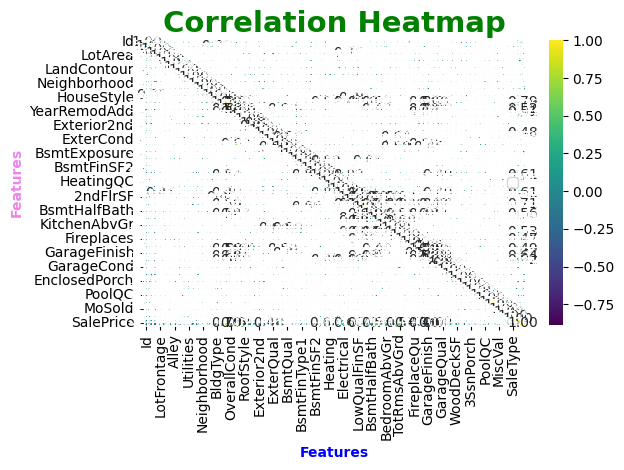

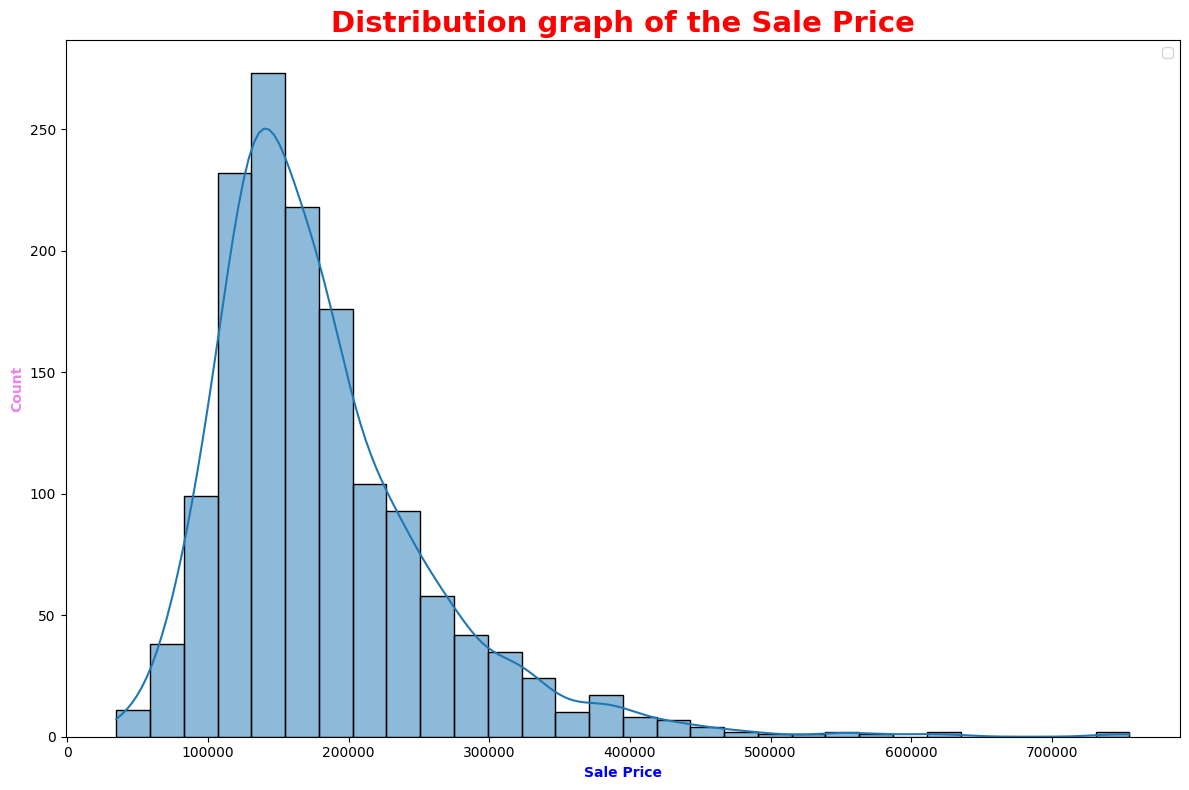

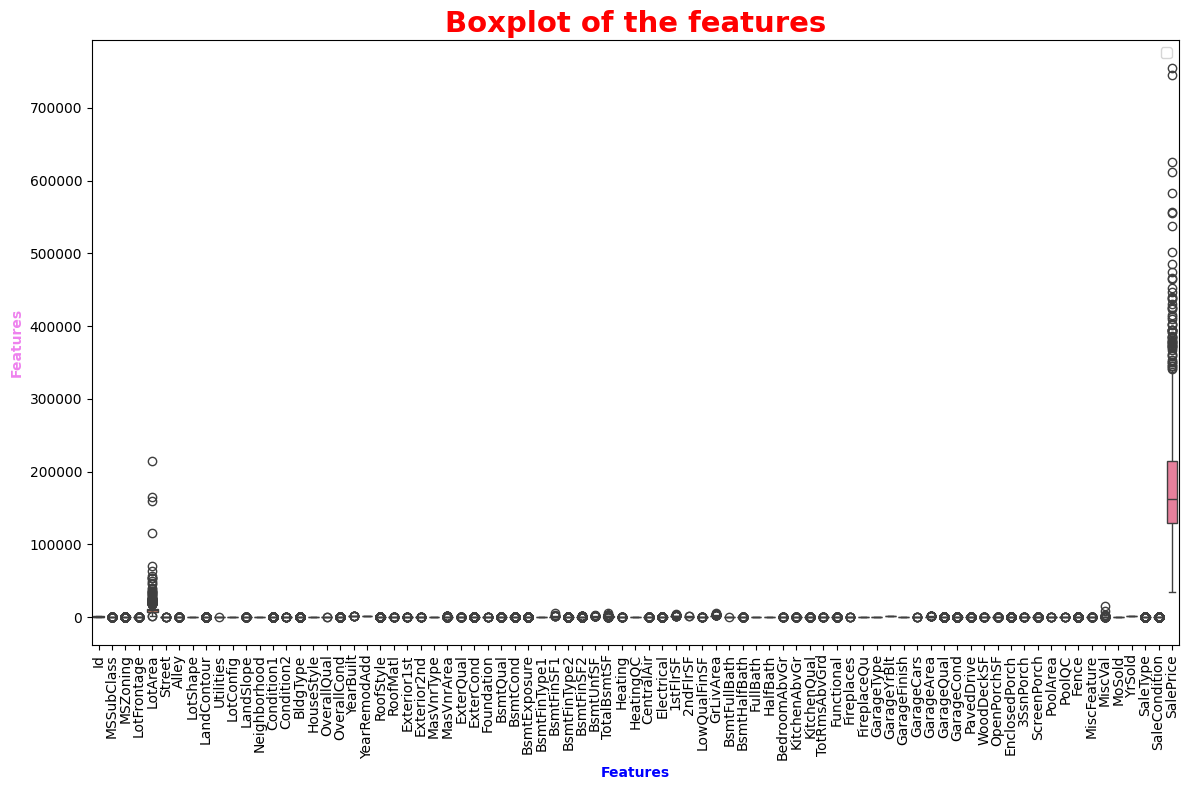

In [12]:
# STEP 3: Basic Visualizations

ze=(12,8)
sns.heatmap(train_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Heatmap", color='green', fontsize=21, fontweight='bold')
plt.xlabel("Features", color='blue', fontweight='bold')
plt.ylabel("Features", color='violet', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# Distribution of the target variable(Whether is skewed, left skewed, right skewed)
plt.figure(figsize=(12,8))
sns.histplot(train_df['SalePrice'], kde=True, bins=30)
plt.title("Distribution graph of the Sale Price", color='red', fontsize='21', fontweight='bold')
plt.xlabel("Sale Price", color='blue', fontweight='bold')
plt.ylabel("Count", color='violet', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot to check the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=train_df)
plt.title("Boxplot of the features", color='red', fontsize='21', fontweight='bold')
plt.xlabel("Features", color='blue', fontweight='bold')
plt.ylabel("Features", color='violet', fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Remove unwanted features
train_df.drop(columns=['Id'], inplace=True)

In [14]:
# STEP 4: Extract the independent and dependent variables

X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Split into Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# STEP 5: Scale the dataset and save the scalers
import pickle

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler using pickle
with open("catgbm_scalers.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("CatGBM scalers dumped successfully!")

CatGBM scalers dumped successfully!


In [16]:
# STEP 6: Optuna Objective function with optimization

import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 300, 1500),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 0.1, 10.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 50),
        "grow_policy": trial.suggest_categorical(
            "grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]
        ),

        # GPU settings (SAFE)
        "loss_function": "RMSE",
        "task_type": "GPU",
        "devices": "0",
        "verbose": 0,
        "random_seed": 42,
    }

    model = CatBoostRegressor(**params)

    pipeline = Pipeline([
        ("model", model)
    ])

    score = cross_val_score(
        pipeline,
        X_train_scaled,
        y_train,
        cv=5,
        scoring="r2"
    ).mean()

    return score


# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Best Hyperparameters:", study.best_params)
print("Best R² Score:", study.best_value)

[I 2026-01-21 14:11:17,144] A new study created in memory with name: no-name-985d8b4e-c903-471e-b9e9-095983d65976


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2026-01-21 14:11:44,198] Trial 0 finished with value: 0.7140469989940015 and parameters: {'iterations': 578, 'depth': 5, 'learning_rate': 0.0024438914477478762, 'l2_leaf_reg': 8.654859775944022, 'bagging_temperature': 1.3669469619179775, 'border_count': 186, 'random_strength': 8.053666958801148, 'min_data_in_leaf': 35, 'grow_policy': 'Depthwise'}. Best is trial 0 with value: 0.7140469989940015.
[I 2026-01-21 14:12:14,158] Trial 1 finished with value: 0.785928050109328 and parameters: {'iterations': 866, 'depth': 6, 'learning_rate': 0.0021179122279638652, 'l2_leaf_reg': 5.8250350420290795, 'bagging_temperature': 0.7568236177106358, 'border_count': 112, 'random_strength': 7.158748666665802, 'min_data_in_leaf': 6, 'grow_policy': 'Lossguide'}. Best is trial 1 with value: 0.785928050109328.
[I 2026-01-21 14:12:36,284] Trial 2 finished with value: 0.8510394683540387 and parameters: {'iterations': 991, 'depth': 7, 'learning_rate': 0.24302427276406868, 'l2_leaf_reg': 7.340145780331461, 'bag

In [17]:
# STEP 8 : Run the best catgbm modelfrom catboost import CatBoostRegressor

best = study.best_params

best_catgbm_model = CatBoostRegressor(
    **best,
    loss_function="RMSE",
    task_type="GPU",
    devices="0",
    random_seed=42,
    verbose=100
)

# Train
best_catgbm_model.fit(X_train_scaled, y_train)

# Predict
y_pred = best_catgbm_model.predict(X_test_scaled)

0:	learn: 76184.0092926	total: 641ms	remaining: 14m 23s
100:	learn: 30218.0805098	total: 1.42s	remaining: 17.6s
200:	learn: 21861.9689797	total: 2.12s	remaining: 12.1s
300:	learn: 18765.2783882	total: 2.83s	remaining: 9.86s
400:	learn: 16702.8360483	total: 3.49s	remaining: 8.24s
500:	learn: 15158.0902834	total: 4.16s	remaining: 7.03s
600:	learn: 13808.7683718	total: 4.86s	remaining: 6.04s
700:	learn: 12721.5337406	total: 5.54s	remaining: 5.11s
800:	learn: 11803.7683326	total: 6.21s	remaining: 4.24s
900:	learn: 11011.6011950	total: 6.95s	remaining: 3.45s
1000:	learn: 10252.7345474	total: 7.67s	remaining: 2.66s
1100:	learn: 9624.7337996	total: 8.38s	remaining: 1.88s
1200:	learn: 9035.4645915	total: 9.05s	remaining: 1.11s
1300:	learn: 8480.3444748	total: 9.74s	remaining: 352ms
1347:	learn: 8242.8771144	total: 10.1s	remaining: 0us


In [18]:
# STEP 9: Predictions and model performance

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train predictions
y_train_pred = best_catgbm_model.predict(X_train_scaled)

# Test predictions
y_test_pred = best_catgbm_model.predict(X_test_scaled)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print results
print("TRAIN R²:", train_r2)
print("TEST  R²:", test_r2)

print("\nTRAIN RMSE:", train_rmse)
print("TEST  RMSE:", test_rmse)

print("\nTRAIN MAE:", train_mae)
print("TEST  MAE:", test_mae)

TRAIN R²: 0.9886085145108098
TEST  R²: 0.9101062506898523

TRAIN RMSE: 8242.881116496825
TEST  RMSE: 26258.605850195778

TRAIN MAE: 5517.779230842554
TEST  MAE: 15327.675666100151


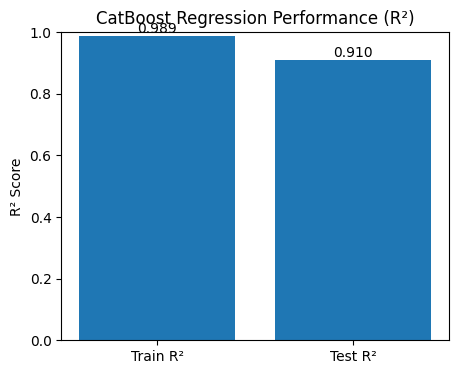

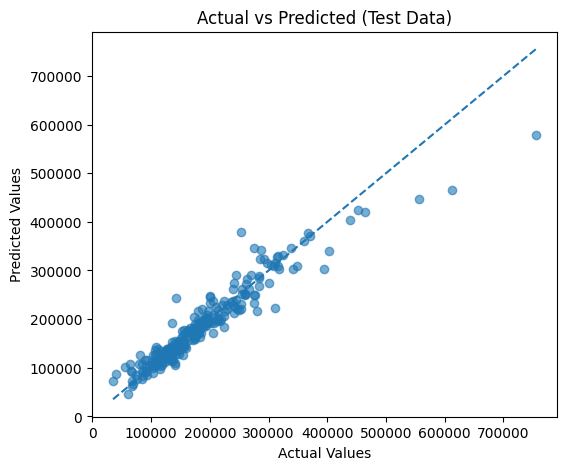

In [20]:
# STEP 10: Visulaizations of the model performances

# Predictions
y_train_pred = best_catgbm_model.predict(X_train_scaled)
y_test_pred = best_catgbm_model.predict(X_test_scaled)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# ---------------- BAR PLOT (R² SCORE) ----------------
scores = [train_r2, test_r2]
labels = ["Train R²", "Test R²"]

plt.figure(figsize=(5,4))
plt.bar(labels, scores)
plt.ylim(0, 1)

for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")

plt.title("CatBoost Regression Performance (R²)")
plt.ylabel("R² Score")
plt.show()

# ---------------- ACTUAL vs PREDICTED ----------------
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Data)")
plt.show()

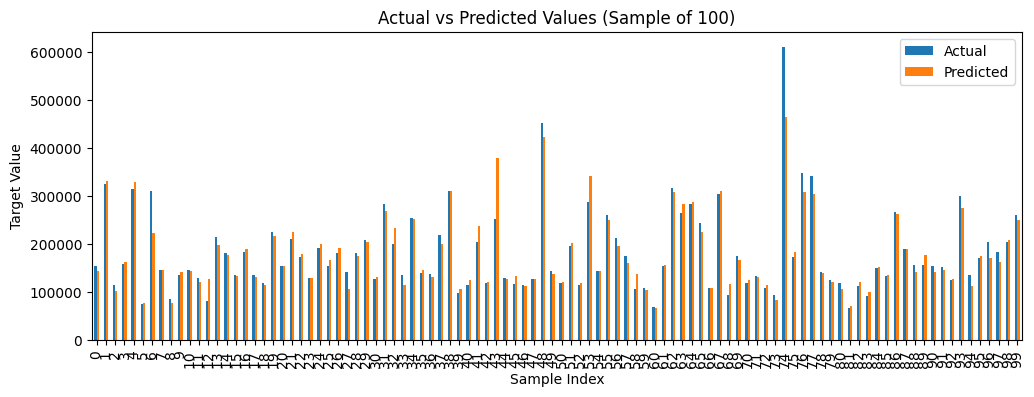

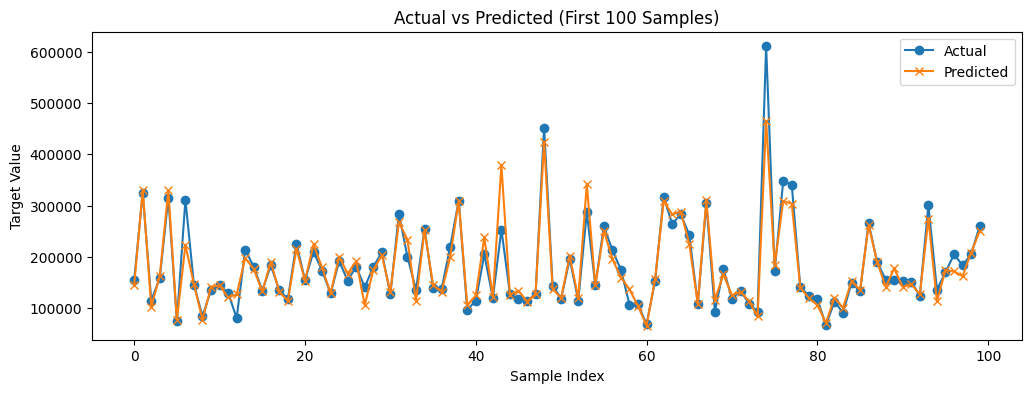

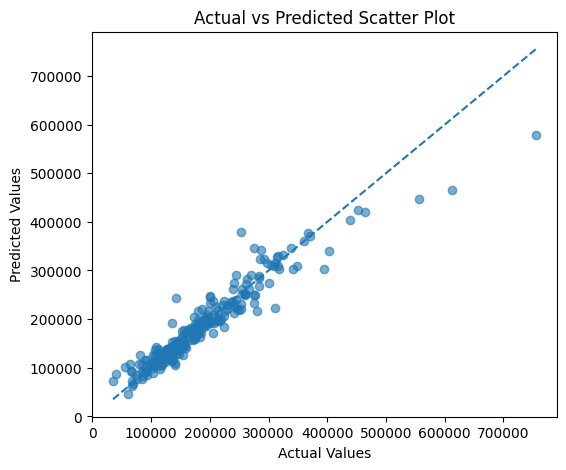

In [21]:
# STEP 11: Take first 100 samples
comparison = pd.DataFrame({
    "Actual": y_test[:100].values,
    "Predicted": y_pred[:100]
})

# ---------------- BAR PLOT ----------------
comparison.plot(kind="bar", figsize=(12,4))
plt.title("Actual vs Predicted Values (Sample of 100)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# ---------------- LINE PLOT ----------------
plt.figure(figsize=(12,4))
plt.plot(y_test[:100].values, label="Actual", marker='o')
plt.plot(y_pred[:100], label="Predicted", marker='x')
plt.title("Actual vs Predicted (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# Scatterplot
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Scatter Plot")
plt.show()

Predicted Transaction Value: 206427.58700415504


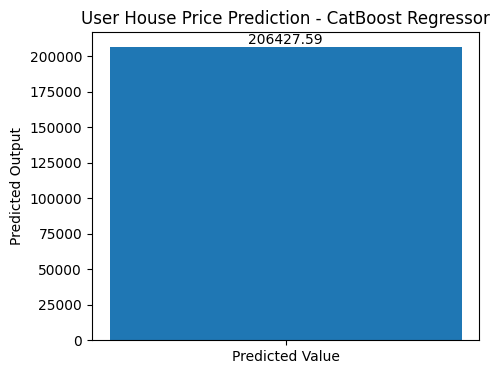

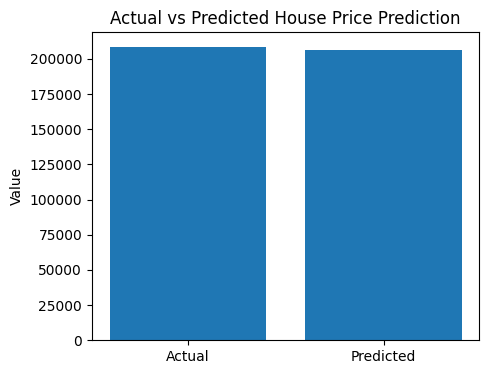

In [24]:
# STEP 12: Actual vs Predicted model check
import joblib

joblib.dump(best_catgbm_model, "house_price_model.pkl")

def predict_transaction_value(user_data):
    # Load scaler and regression model
    scaler = joblib.load("catgbm_scalers.pkl")
    model = joblib.load("house_price_model.pkl")  # CatBoostRegressor

    # Scale input
    user_scaled = scaler.transform([user_data])

    # Predict continuous value
    prediction = model.predict(user_scaled)[0]

    return prediction

import matplotlib.pyplot as plt

# Example: take one real sample as user input
sample_user = X.iloc[0].values  

predicted_value = predict_transaction_value(sample_user)

print("Predicted Transaction Value:", predicted_value)

# ---------------- Visualization ----------------
plt.figure(figsize=(5,4))
plt.bar(["Predicted Value"], [predicted_value])
plt.ylabel("Predicted Output")
plt.title("User House Price Prediction - CatBoost Regressor")

# Add value label
plt.text(0, predicted_value, f"{predicted_value:.2f}", ha="center", va="bottom")
plt.show()

# Compare with actual value (if available)
actual_value = y.iloc[0]

plt.figure(figsize=(5,4))
plt.bar(["Actual", "Predicted"], [actual_value, predicted_value])
plt.ylabel("Value")
plt.title("Actual vs Predicted House Price Prediction")
plt.show()

In [25]:
# STEP 13: Save the full pipeline

joblib.dump({
    "model": best_catgbm_model,
    "scaler": scaler,
    "label_encoders": encoders
}, "house_price_full_pipeline.pkl")

print("Full pipeline saved successfully")

Full pipeline saved successfully
